In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [0]:
clean_dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Bike_sharing/cleaned_csv/trips_data.csv')

In [68]:
clean_dataset

,start_station,seasons,dayOfWeek,hour,total_trips
0,31000,0,0,0,1
1,31000,0,0,1,1
2,31000,0,0,2,1
3,31000,0,0,5,1
4,31000,0,0,6,1
...,...,...,...,...,...
284457,32609,3,6,12,1
284458,32609,3,6,14,1
284459,32609,3,6,16,1
284460,32609,3,6,17,1


In [69]:
clean_dataset.total_trips.max()

43

In [0]:
X_clean = clean_dataset.iloc[:, 0:4].values
y_clean = clean_dataset.iloc[:, 4].values

In [0]:
X_clean_train, X_clean_test, y_clean_train, y_clean_test = train_test_split(X_clean, y_clean, test_size=0.20, random_state=42)

In [73]:
regressor_clean = RandomForestRegressor(n_estimators = 500, random_state = 0, max_leaf_nodes=3,min_samples_split=10)
regressor_clean.fit(X_clean_train,y_clean_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=3,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [74]:
predictions_clean = regressor_clean.predict(X_clean_test)
predictions_clean

array([2.28000988, 1.02945806, 2.28000988, ..., 1.02945806, 2.28000988,
       2.28000988])

In [75]:
predictions_clean.max()

2.280009877915144

In [76]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_clean_test, predictions_clean)

0.13954918858746504

(0.0, 7.0)

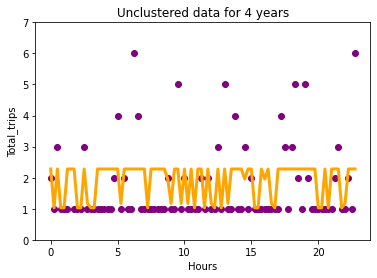

In [77]:
X_grid = np.arange(X_clean_test[:,3].min(), X_clean_test[:,3].max(), 0.25)
X_grid = X_grid.reshape((len(X_grid), 1)) 
plt.scatter(X_grid, y_clean_test[:92], color='purple')
plt.plot(X_grid, predictions_clean[:92], color='orange', linewidth=3)
plt.xlabel('Hours')
plt.ylabel('Total_trips')
plt.title('Unclustered data for 4 years')
plt.ylim(0,7)

In [78]:
from sklearn.metrics import r2_score
r2_score(y_clean_test, predictions_clean)

0.10148922441714958

In [0]:
# for 2 years
cluster_dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Bike_sharing/cleaned_csv/clustered_data.csv')
cluster_X = cluster_dataset.iloc[:, 0:4].values
cluster_y = cluster_dataset.iloc[:, 4].values

In [0]:
X_cluster_train, X_cluster_test, y_cluster_train, y_cluster_test = train_test_split(cluster_X, cluster_y, test_size=0.20, random_state=42)

In [83]:
from sklearn.ensemble import RandomForestRegressor
regressor_cluster = RandomForestRegressor(n_estimators = 500, random_state = 0, max_leaf_nodes=3,min_samples_split=10)
regressor_cluster.fit(cluster_X,cluster_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=3,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [84]:
predictions_cluster = regressor_cluster.predict(X_cluster_test)
predictions_cluster

array([1.20501102, 1.20501102, 1.20501102, ..., 1.20501102, 1.20501102,
       1.20501102])

In [85]:
predictions_cluster.max()

1.98994790727227

In [86]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_cluster_test, predictions_cluster)

0.049185727429454665

In [87]:
from sklearn.metrics import r2_score
r2_score(y_cluster_test, predictions_cluster)

0.13563445970298604

(0.0, 7.0)

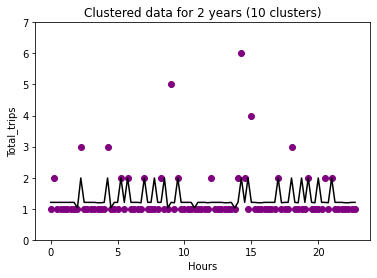

In [88]:
X_grid_cluster = np.arange(X_cluster_test[:,3].min(), X_cluster_test[:,3].max(), 0.25)
X_grid_cluster = X_grid_cluster.reshape((len(X_grid_cluster), 1)) 
plt.scatter(X_grid_cluster, y_cluster_test[:92], color='purple',)
plt.plot(X_grid_cluster, predictions_cluster[:92], color='black')
plt.xlabel('Hours')
plt.ylabel('Total_trips')
plt.title('Clustered data for 2 years (10 clusters)')
plt.ylim(0,7)